In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(2565.2026)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 48


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 764.61167  validloss 1621.20257±0.00000  bestvalidloss 1621.20257  last_update 0
train: iter 1  trainloss 388.33119  validloss 1805.66724±0.00000  bestvalidloss 1621.20257  last_update 1
train: iter 2  trainloss 138.66847  validloss 1754.83935±0.00000  bestvalidloss 1621.20257  last_update 2
train: iter 3  trainloss -101.58524  validloss 2342.06739±0.00000  bestvalidloss 1621.20257  last_update 3
train: iter 4  trainloss -298.67708  validloss 4364.44851±0.00000  bestvalidloss 1621.20257  last_update 4
train: iter 5  trainloss -432.53903  validloss 2239.49141±0.00000  bestvalidloss 1621.20257  last_update 5
train: iter 6  trainloss -507.06162  validloss 2462.71734±0.00000  bestvalidloss 1621.20257  last_update 6
train: iter 7  trainloss -543.89117  validloss 3840.69872±0.00000  bestvalidloss 1621.20257  last_update 7
train: iter 8  trainloss -690.46240  validloss 2548.48370±0.00000  bestvalidloss 1621.20257  last_update 8
train: iter 9  trainl

train: iter 76  trainloss -1567.60822  validloss -47.11537±0.00000  bestvalidloss -423.58657  last_update 8
train: iter 77  trainloss -1522.31866  validloss -74.28592±0.00000  bestvalidloss -423.58657  last_update 9
train: iter 78  trainloss -1483.46124  validloss -587.41999±0.00000  bestvalidloss -587.41999  last_update 0
train: iter 79  trainloss -1576.54407  validloss -661.07101±0.00000  bestvalidloss -661.07101  last_update 0
train: iter 80  trainloss -1567.97786  validloss -320.84480±0.00000  bestvalidloss -661.07101  last_update 1
train: iter 81  trainloss -1578.66092  validloss -357.21597±0.00000  bestvalidloss -661.07101  last_update 2
train: iter 82  trainloss -1494.11006  validloss -477.48973±0.00000  bestvalidloss -661.07101  last_update 3
train: iter 83  trainloss -1593.90808  validloss -669.93502±0.00000  bestvalidloss -669.93502  last_update 0
train: iter 84  trainloss -1618.52258  validloss -670.43895±0.00000  bestvalidloss -670.43895  last_update 0
train: iter 85  train

train: iter 150  trainloss -1866.22767  validloss -1269.33158±0.00000  bestvalidloss -1550.31496  last_update 1
train: iter 151  trainloss -1823.86468  validloss -1525.68290±0.00000  bestvalidloss -1550.31496  last_update 2
train: iter 152  trainloss -1820.69199  validloss -1237.21331±0.00000  bestvalidloss -1550.31496  last_update 3
train: iter 153  trainloss -1831.23297  validloss -1443.35555±0.00000  bestvalidloss -1550.31496  last_update 4
train: iter 154  trainloss -1871.86594  validloss -1507.30544±0.00000  bestvalidloss -1550.31496  last_update 5
train: iter 155  trainloss -1907.76316  validloss -1601.22940±0.00000  bestvalidloss -1601.22940  last_update 0
train: iter 156  trainloss -1884.52187  validloss -1552.82515±0.00000  bestvalidloss -1601.22940  last_update 1
train: iter 157  trainloss -1897.63482  validloss -1564.53286±0.00000  bestvalidloss -1601.22940  last_update 2
train: iter 158  trainloss -1756.12153  validloss -1279.42524±0.00000  bestvalidloss -1601.22940  last_u

train: iter 223  trainloss -1941.83561  validloss -1709.43689±0.00000  bestvalidloss -1754.73155  last_update 11
train: iter 224  trainloss -1893.15677  validloss -1605.99846±0.00000  bestvalidloss -1754.73155  last_update 12
train: iter 225  trainloss -1927.46903  validloss -1685.96607±0.00000  bestvalidloss -1754.73155  last_update 13
train: iter 226  trainloss -1930.56726  validloss -1561.51972±0.00000  bestvalidloss -1754.73155  last_update 14
train: iter 227  trainloss -1909.32331  validloss -1624.03379±0.00000  bestvalidloss -1754.73155  last_update 15
train: iter 228  trainloss -1893.79795  validloss -1492.84713±0.00000  bestvalidloss -1754.73155  last_update 16
train: iter 229  trainloss -1956.34093  validloss -1303.46088±0.00000  bestvalidloss -1754.73155  last_update 17
train: iter 230  trainloss -1982.93445  validloss -1747.18125±0.00000  bestvalidloss -1754.73155  last_update 18
train: iter 231  trainloss -1975.71594  validloss -1696.23264±0.00000  bestvalidloss -1754.73155

train: iter 296  trainloss -1982.28926  validloss -1668.35942±0.00000  bestvalidloss -1799.62253  last_update 47
train: iter 297  trainloss -1946.80272  validloss -1760.94679±0.00000  bestvalidloss -1799.62253  last_update 48
train: iter 298  trainloss -1971.77022  validloss -1572.53683±0.00000  bestvalidloss -1799.62253  last_update 49
train: iter 299  trainloss -1962.52435  validloss -1827.17887±0.00000  bestvalidloss -1827.17887  last_update 0
train: iter 300  trainloss -1883.35713  validloss -1664.70644±0.00000  bestvalidloss -1827.17887  last_update 1
train: iter 301  trainloss -1980.04080  validloss -1600.91150±0.00000  bestvalidloss -1827.17887  last_update 2
train: iter 302  trainloss -1933.38986  validloss -1780.17949±0.00000  bestvalidloss -1827.17887  last_update 3
train: iter 303  trainloss -1980.34038  validloss -1717.23057±0.00000  bestvalidloss -1827.17887  last_update 4
train: iter 304  trainloss -1999.82143  validloss -1800.02734±0.00000  bestvalidloss -1827.17887  las

train: iter 369  trainloss -2025.13015  validloss -1850.40072±0.00000  bestvalidloss -1850.40072  last_update 0
train: iter 370  trainloss -1989.72057  validloss -1825.97220±0.00000  bestvalidloss -1850.40072  last_update 1
train: iter 371  trainloss -1980.37539  validloss -1831.49861±0.00000  bestvalidloss -1850.40072  last_update 2
train: iter 372  trainloss -1880.79268  validloss -1524.44342±0.00000  bestvalidloss -1850.40072  last_update 3
train: iter 373  trainloss -1950.31842  validloss -1592.96366±0.00000  bestvalidloss -1850.40072  last_update 4
train: iter 374  trainloss -2031.71962  validloss -1797.82339±0.00000  bestvalidloss -1850.40072  last_update 5
train: iter 375  trainloss -1985.99381  validloss -1787.53607±0.00000  bestvalidloss -1850.40072  last_update 6
train: iter 376  trainloss -1990.97533  validloss -1827.72269±0.00000  bestvalidloss -1850.40072  last_update 7
train: iter 377  trainloss -2000.22812  validloss -1765.13620±0.00000  bestvalidloss -1850.40072  last_u

train: iter 442  trainloss -1957.61975  validloss -1596.78699±0.00000  bestvalidloss -1878.81863  last_update 42
train: iter 443  trainloss -2019.72561  validloss -1801.71815±0.00000  bestvalidloss -1878.81863  last_update 43
train: iter 444  trainloss -1938.59279  validloss -1815.70786±0.00000  bestvalidloss -1878.81863  last_update 44
train: iter 445  trainloss -1978.54633  validloss -1353.48936±0.00000  bestvalidloss -1878.81863  last_update 45
train: iter 446  trainloss -2026.76024  validloss -1807.06324±0.00000  bestvalidloss -1878.81863  last_update 46
train: iter 447  trainloss -1982.32094  validloss -1828.69165±0.00000  bestvalidloss -1878.81863  last_update 47
train: iter 448  trainloss -2040.29379  validloss -1852.38974±0.00000  bestvalidloss -1878.81863  last_update 48
train: iter 449  trainloss -1992.83428  validloss -1741.13323±0.00000  bestvalidloss -1878.81863  last_update 49
train: iter 450  trainloss -2003.60869  validloss -1818.15722±0.00000  bestvalidloss -1878.81863

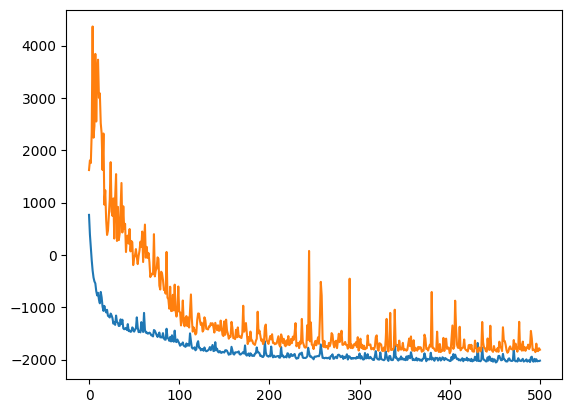

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
# plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 10.06809  validloss 10.47783±0.00000  bestvalidloss 10.47783  last_update 0
train: iter 1  trainloss 9.19484  validloss 9.52402±0.00000  bestvalidloss 9.52402  last_update 0
train: iter 2  trainloss 8.44282  validloss 8.70496±0.00000  bestvalidloss 8.70496  last_update 0
train: iter 3  trainloss 7.82872  validloss 8.03860±0.00000  bestvalidloss 8.03860  last_update 0
train: iter 4  trainloss 7.29458  validloss 7.49274±0.00000  bestvalidloss 7.49274  last_update 0
train: iter 5  trainloss 6.83511  validloss 6.98787±0.00000  bestvalidloss 6.98787  last_update 0
train: iter 6  trainloss 6.46356  validloss 6.60559±0.00000  bestvalidloss 6.60559  last_update 0
train: iter 7  trainloss 6.11495  validloss 6.23012±0.00000  bestvalidloss 6.23012  last_update 0
train: iter 8  trainloss 5.82148  validloss 5.93235±0.00000  bestvalidloss 5.93235  last_update 0
train: iter 9  trainloss 5.55873  validloss 5.65660±0.00000  bestvalidloss 5.65660  last_update 0
train: iter 10  t

train: iter 85  trainloss 0.63995  validloss 0.90232±0.00000  bestvalidloss 0.90232  last_update 0
train: iter 86  trainloss 0.60305  validloss 0.86691±0.00000  bestvalidloss 0.86691  last_update 0
train: iter 87  trainloss 0.57748  validloss 0.82275±0.00000  bestvalidloss 0.82275  last_update 0
train: iter 88  trainloss 0.54142  validloss 0.83560±0.00000  bestvalidloss 0.82275  last_update 1
train: iter 89  trainloss 0.55594  validloss 0.81207±0.00000  bestvalidloss 0.81207  last_update 0
train: iter 90  trainloss 0.52181  validloss 0.81357±0.00000  bestvalidloss 0.81207  last_update 1
train: iter 91  trainloss 0.49362  validloss 0.77412±0.00000  bestvalidloss 0.77412  last_update 0
train: iter 92  trainloss 0.47615  validloss 0.76856±0.00000  bestvalidloss 0.76856  last_update 0
train: iter 93  trainloss 0.45149  validloss 0.71312±0.00000  bestvalidloss 0.71312  last_update 0
train: iter 94  trainloss 0.44062  validloss 0.69725±0.00000  bestvalidloss 0.69725  last_update 0
train: ite

train: iter 177  trainloss 0.27038  validloss 0.68586±0.00000  bestvalidloss 0.60847  last_update 64
train: iter 178  trainloss 0.28623  validloss 0.69238±0.00000  bestvalidloss 0.60847  last_update 65
train: iter 179  trainloss 0.29005  validloss 0.68010±0.00000  bestvalidloss 0.60847  last_update 66
train: iter 180  trainloss 0.25849  validloss 0.67175±0.00000  bestvalidloss 0.60847  last_update 67
train: iter 181  trainloss 0.28638  validloss 0.76310±0.00000  bestvalidloss 0.60847  last_update 68
train: iter 182  trainloss 0.27803  validloss 0.69222±0.00000  bestvalidloss 0.60847  last_update 69
train: iter 183  trainloss 0.28687  validloss 0.67180±0.00000  bestvalidloss 0.60847  last_update 70
train: iter 184  trainloss 0.30873  validloss 0.67900±0.00000  bestvalidloss 0.60847  last_update 71
train: iter 185  trainloss 0.30159  validloss 0.73278±0.00000  bestvalidloss 0.60847  last_update 72
train: iter 186  trainloss 0.27670  validloss 0.69137±0.00000  bestvalidloss 0.60847  last_

train: iter 268  trainloss 0.27662  validloss 0.70091±0.00000  bestvalidloss 0.60215  last_update 70
train: iter 269  trainloss 0.26763  validloss 0.70088±0.00000  bestvalidloss 0.60215  last_update 71
train: iter 270  trainloss 0.25382  validloss 0.70468±0.00000  bestvalidloss 0.60215  last_update 72
train: iter 271  trainloss 0.25653  validloss 0.68255±0.00000  bestvalidloss 0.60215  last_update 73
train: iter 272  trainloss 0.29394  validloss 0.65934±0.00000  bestvalidloss 0.60215  last_update 74
train: iter 273  trainloss 0.26577  validloss 0.75073±0.00000  bestvalidloss 0.60215  last_update 75
train: iter 274  trainloss 0.29776  validloss 0.69732±0.00000  bestvalidloss 0.60215  last_update 76
train: iter 275  trainloss 0.28318  validloss 0.68339±0.00000  bestvalidloss 0.60215  last_update 77
train: iter 276  trainloss 0.28682  validloss 0.70202±0.00000  bestvalidloss 0.60215  last_update 78
train: iter 277  trainloss 0.28470  validloss 0.70813±0.00000  bestvalidloss 0.60215  last_

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([-1.9208, -3.6822, -2.3639, -2.7487], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 97.47503  validloss 96.38143±0.00000  bestvalidloss 96.38143  last_update 0
train: iter 1  trainloss 71.89032  validloss 76.02031±0.00000  bestvalidloss 76.02031  last_update 0
train: iter 2  trainloss 51.72721  validloss 52.97691±0.00000  bestvalidloss 52.97691  last_update 0
train: iter 3  trainloss 39.48993  validloss 39.36514±0.00000  bestvalidloss 39.36514  last_update 0
train: iter 4  trainloss 30.74761  validloss 30.75997±0.00000  bestvalidloss 30.75997  last_update 0
train: iter 5  trainloss 24.11822  validloss 24.36311±0.00000  bestvalidloss 24.36311  last_update 0
train: iter 6  trainloss 18.99544  validloss 19.49599±0.00000  bestvalidloss 19.49599  last_update 0
train: iter 7  trainloss 14.98237  validloss 15.92467±0.00000  bestvalidloss 15.92467  last_update 0
train: iter 8  trainloss 11.87992  validloss 13.30599±0.00000  bestvalidloss 13.30599  last_update 0
train: iter 9  trainloss 9.46315  validloss 11.34036±0.00000  bestvalidloss 11.34036  last_

train: iter 84  trainloss 1.44611  validloss 4.98591±0.00000  bestvalidloss 4.74524  last_update 26
train: iter 85  trainloss 1.44091  validloss 4.81011±0.00000  bestvalidloss 4.74524  last_update 27
train: iter 86  trainloss 1.38591  validloss 4.87490±0.00000  bestvalidloss 4.74524  last_update 28
train: iter 87  trainloss 1.45496  validloss 5.34552±0.00000  bestvalidloss 4.74524  last_update 29
train: iter 88  trainloss 1.42404  validloss 5.00031±0.00000  bestvalidloss 4.74524  last_update 30
train: iter 89  trainloss 1.41773  validloss 4.82080±0.00000  bestvalidloss 4.74524  last_update 31
train: iter 90  trainloss 1.42907  validloss 4.80439±0.00000  bestvalidloss 4.74524  last_update 32
train: iter 91  trainloss 1.43622  validloss 5.03803±0.00000  bestvalidloss 4.74524  last_update 33
train: iter 92  trainloss 1.42202  validloss 4.89283±0.00000  bestvalidloss 4.74524  last_update 34
train: iter 93  trainloss 1.44766  validloss 4.87039±0.00000  bestvalidloss 4.74524  last_update 35


In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-10.7155)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(1.8864)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.2536902322469011
tensor([1.3300])
